# Activity 2.01: Assembling a Deep Learning System
In this activity, we will train the first version of our LSTM model using Bitcoin daily closing prices. These prices will be organized using the weeks of both 2016 and 2017. We do that because we are interested in predicting the prices of a week's worth of trading.

Let's go ahead and import our data.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from tensorflow.keras.models import load_model

In [24]:
plt.style.use('seaborn-white')

### Shaping Data
Neural networks typically work with vectors and tensors, both mathematical objects that organize data in a number of dimensions. 

In [25]:
train = pd.read_csv('data/train_dataset.csv')

In [26]:
train.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
0,2016-01-04,2016-1,433.091003,38477500,0.000000,0.000000
1,2016-01-05,2016-1,431.959991,34522600,-0.002611,-0.102785
2,2016-01-06,2016-1,429.105011,34042500,-0.009204,-0.115262
3,2016-01-07,2016-1,458.048004,87562200,0.057625,1.275673
4,2016-01-08,2016-1,453.230011,56993000,0.046501,0.481203


LSTM networks require vectors with three dimensions. These dimensions are:
    
* **Period length**: The period length, i.e. how many observations is there on a period.
* **Number of periods**: How many periods are available in the dataset.
* **Number of features**: Number of features available in the dataset.

We will create weekly groups then rearrange the resulting array to match those dimensions.

In [27]:
def create_groups(data, group_size=7):
    """
    Creates distinct groups from a given continuous series.
    
    Parameters
    ----------
    data: np.array
        Series of continious observations.

    group_size: int, default 7
        Determines how large the groups are. That is,
        how many observations each group contains.
    
    Returns
    -------
    A Numpy array object. 
    """
    samples = list()
    for i in range(0, len(data), group_size):
        sample = list(data[i:i + group_size])
        if len(sample) == group_size:
            samples.append(np.array(sample).reshape(1, group_size).tolist())
    return np.array(samples)

In [28]:
data = create_groups(train['close_point_relative_normalization'].values, 7)

In [29]:
len(data)

187

In [30]:
X_train = data[:-1,:].reshape(1, 186, 7)
Y_validation = data[-1].reshape(1, 7)

### Load Our Model
Let's start by loading our previously trained model. 

In [31]:
model = load_model('bitcoin_lstm_v0.h5')

### Make Predictions


In [32]:
%%time
history = model.fit(
    x=X_train, y=Y_validation,
     epochs=100)

Train on 1 samples
Epoch 1/100
1/1 [==============================] - 1s 604ms/sample - loss: 0.0096
Epoch 2/100
1/1 [==============================] - 0s 76ms/sample - loss: 0.0085
Epoch 3/100
1/1 [==============================] - 0s 91ms/sample - loss: 0.0078
Epoch 4/100
1/1 [==============================] - 0s 81ms/sample - loss: 0.0072
Epoch 5/100
1/1 [==============================] - 0s 85ms/sample - loss: 0.0067
Epoch 6/100
1/1 [==============================] - 0s 81ms/sample - loss: 0.0062
Epoch 7/100
1/1 [==============================] - 0s 91ms/sample - loss: 0.0058
Epoch 8/100
1/1 [==============================] - 0s 78ms/sample - loss: 0.0054
Epoch 9/100
1/1 [==============================] - 0s 100ms/sample - loss: 0.0051
Epoch 10/100
1/1 [==============================] - 0s 82ms/sample - loss: 0.0047
Epoch 11/100
1/1 [==============================] - 0s 85ms/sample - loss: 0.0044
Epoch 12/100
1/1 [==============================] - 0s 72ms/sample - loss: 0.0041
Epoc

Epoch 98/100
1/1 [==============================] - 0s 84ms/sample - loss: 6.5274e-06
Epoch 99/100
1/1 [==============================] - 0s 90ms/sample - loss: 6.7354e-06
Epoch 100/100
1/1 [==============================] - 0s 77ms/sample - loss: 6.5776e-06
CPU times: user 17.7 s, sys: 830 ms, total: 18.5 s
Wall time: 9.18 s


In [33]:
model.save('bitcoin_lstm_v0_trained.h5')

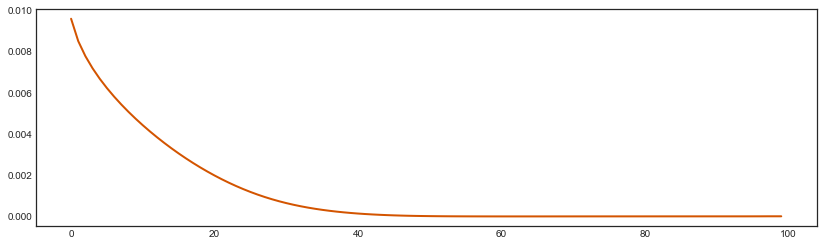

In [34]:
pd.Series(history.history['loss']).plot(linewidth=2, figsize=(14, 4), color='#d35400')

In [35]:
def denormalize(series, last_value):
    result = last_value * (series + 1)
    return result

In [41]:
predictions = model.predict(x=X_train)[0]

In [42]:
last_weeks_value = train[train['date'] == train['date'].max()]['close'].values[0]
denormalized_prediction = denormalize(predictions, last_weeks_value)

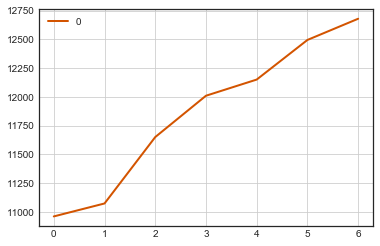

In [43]:
pd.DataFrame(denormalized_prediction).plot(linewidth=2, figsize=(6, 4), color='#d35400', grid=True)

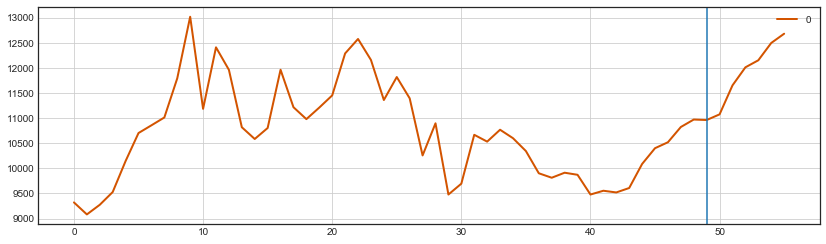

In [44]:
full_series = list(train['close'].values) + list(denormalized_prediction)
pd.DataFrame(full_series[-7*8:]).plot(linewidth=2, figsize=(14, 4), color='#d35400', grid=True)
plt.axvline(len(full_series[-7*8:]) - 7)

### Summary
In this activity, we have assembled a complete deep learning system: from data to prediction. The model created in this activity need a number of improvements before it can be considered useful. However, it serves as a great starting point from which we will continuously improve.